<a href="https://colab.research.google.com/github/wandersonxs/Financas-Machine-Learning-Course/blob/main/S8_Python_para_finan%C3%A7as_simula%C3%A7%C3%B5es_Monte_Carlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python para finanças - simulação Monte Carlos para previsão de preços de ações

## Importação das bibliotecas e preparação da base de dados

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
from scipy import stats

In [ ]:
dataset = pd.read_csv('acoes.csv')
dataset

,Date,GOL,CVC,WEGE,MGLU,TOTS,BOVA
0,2015-01-02,14.990000,15.20,11.846200,0.232812,35.732101,47.259998
1,2015-01-05,14.850000,15.00,11.926900,0.237187,34.634201,46.320000
2,2015-01-06,15.210000,14.80,11.750000,0.234062,32.468300,46.580002
3,2015-01-07,14.550000,14.67,11.615400,0.241875,32.238701,48.150002
4,2015-01-08,14.270000,14.15,11.811500,0.240000,32.987301,48.509998
...,...,...,...,...,...,...,...
1441,2020-10-27,18.600000,14.17,83.239998,25.450001,28.500000,95.800003
1442,2020-10-28,16.920000,12.77,79.139999,24.629999,27.500000,92.430000
1443,2020-10-29,16.610001,12.68,80.029999,25.360001,28.500000,92.910004
1444,2020-10-30,15.690000,12.28,75.830002,24.629999,27.000000,90.660004


In [ ]:
figura = px.line(title = 'Histórico do preço das ações')
for i in dataset.columns[1:]:
  figura.add_scatter(x = dataset['Date'], y = dataset[i], name = i)
figura.show()

In [ ]:
dataset = pd.DataFrame(dataset['BOVA'])
dataset

,BOVA
0,47.259998
1,46.320000
2,46.580002
3,48.150002
4,48.509998
...,...
1441,95.800003
1442,92.430000
1443,92.910004
1444,90.660004


In [ ]:
dataset_normalizado = dataset.copy()
for i in dataset:
  dataset_normalizado[i] = dataset[i] / dataset[i][0]
dataset_normalizado

,BOVA
0,1.000000
1,0.980110
2,0.985612
3,1.018832
4,1.026449
...,...
1441,2.027084
1442,1.955777
1443,1.965933
1444,1.918324


In [ ]:
dataset_taxa_retorno = np.log(1 + dataset_normalizado.pct_change())
dataset_taxa_retorno

,BOVA
0,NaN
1,-0.020090
2,0.005597
3,0.033150
4,0.007449
...,...
1441,-0.010074
1442,-0.035811
1443,0.005180
1444,-0.024515


In [ ]:
dataset_taxa_retorno.fillna(0, inplace=True)
dataset_taxa_retorno.head()

,BOVA
0,0.000000
1,-0.020090
2,0.005597
3,0.033150
4,0.007449


## Cálculo do drift

In [ ]:
media = dataset_taxa_retorno.mean()
media

BOVA    0.000464
dtype: float64

In [ ]:
variancia = dataset_taxa_retorno.var()
variancia

BOVA    0.000304
dtype: float64

In [ ]:
drift = media - (0.5 * variancia)
drift

BOVA    0.000312
dtype: float64

## Cálculo dos retornos diários

In [ ]:
dias_frente = 50
simulacoes = 10

In [ ]:
desvio_padrao = dataset_taxa_retorno.std()
desvio_padrao

BOVA    0.017426
dtype: float64

In [ ]:
Z = stats.norm.ppf(np.random.rand(dias_frente, simulacoes))

In [ ]:
Z.shape

(50, 10)

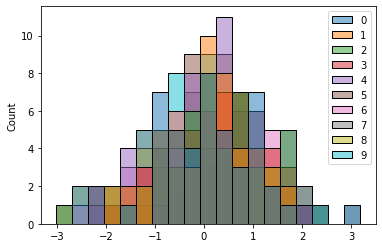

In [ ]:
sns.histplot(Z);

In [ ]:
Z

array([[-9.60383590e-01, -1.54212223e+00,  1.39391165e+00,
         5.60184285e-01,  1.96140736e-01, -1.36889517e-01,
         6.41317433e-02, -2.07614649e+00,  8.54348362e-01,
         2.44353596e-01],
       [-5.98782936e-01, -4.43565672e-02,  2.32128523e-01,
        -1.72787266e-01,  5.85138816e-01, -2.45585893e-01,
         1.96852561e+00, -1.85729415e+00,  4.97936656e-01,
         1.47898772e+00],
       [-3.82715987e-01,  1.47321825e+00, -2.87000789e-01,
        -1.40674504e-01, -9.72219747e-01, -2.74322210e-01,
        -7.03584080e-01, -7.56002813e-01,  7.48593468e-01,
        -9.02811711e-01],
       [ 7.13288363e-03,  1.83623481e+00,  9.56967085e-01,
         4.13445364e-01,  1.64549355e+00,  1.88453807e+00,
         1.01944124e+00,  1.45994813e+00, -5.86791709e-01,
        -2.47281699e-01],
       [-4.67170271e-01,  2.18680013e-01,  1.52360011e-01,
        -5.28492291e-02, -3.30731305e-01, -1.23412330e+00,
         3.24035303e-01,  6.68134887e-01,  1.82441044e-01,
        -4.

In [ ]:
retornos_diarios = np.exp(drift.values + desvio_padrao.values * Z)

In [ ]:
retornos_diarios.shape

(50, 10)

In [ ]:
retornos_diarios

array([[0.98371053, 0.97378874, 1.02490715, 1.01012452, 1.0037368 ,
        0.99792864, 1.00143048, 0.96476886, 1.01531577, 1.00458044],
       [0.98992866, 0.99953907, 1.00436646, 0.99730458, 1.01056387,
        0.99604023, 1.03522125, 0.96845521, 1.00902941, 1.02642773],
       [0.99366292, 1.02632454, 0.99532165, 0.99786282, 0.98350766,
        0.99554158, 0.98812245, 0.98722027, 1.0134464 , 0.98469792],
       [1.0004363 , 1.03283752, 1.017133  , 1.00754487, 1.02941024,
        1.03370725, 1.01824092, 1.02608723, 0.99013554, 0.99601079],
       [0.99220163, 1.00413111, 1.00297132, 0.99939115, 0.99456347,
        0.97902926, 1.00597629, 1.01202648, 1.00349721, 0.99221176],
       [0.99614313, 1.01416726, 1.00408889, 1.01412643, 1.00613576,
        1.00642041, 0.97858564, 1.01475555, 0.98744984, 0.9790343 ],
       [1.01819781, 0.99949664, 0.98679653, 1.01070467, 0.99314611,
        1.03430701, 0.99231826, 1.03243224, 1.01028978, 0.99330197],
       [1.00716858, 0.98197791, 1.0330653

## Previsões de preços futuros

In [ ]:
previsoes = np.zeros_like(retornos_diarios)

In [ ]:
previsoes.shape

(50, 10)

In [ ]:
previsoes

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 

In [ ]:
previsoes[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
dataset.tail(1)

,BOVA
1445,92.410004


In [ ]:
dataset.iloc[-1]

BOVA    92.410004
Name: 1445, dtype: float64

In [ ]:
previsoes[0] = dataset.iloc[-1]
previsoes

array([[92.41000366, 92.41000366, 92.41000366, 92.41000366, 92.41000366,
        92.41000366, 92.41000366, 92.41000366, 92.41000366, 92.41000366],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        

In [ ]:
for dia in range(1, dias_frente):
  #print(dia)
  previsoes[dia] = previsoes[dia - 1] * retornos_diarios[dia]

In [ ]:
previsoes.shape

(50, 10)

In [ ]:
92.41000366 * 1.00854274

93.19943829466642

In [ ]:
93.19943859 * 0.98145488

91.47104381741582

In [ ]:
previsoes

array([[ 92.41000366,  92.41000366,  92.41000366,  92.41000366,
         92.41000366,  92.41000366,  92.41000366,  92.41000366,
         92.41000366,  92.41000366],
       [ 91.47931125,  92.3674088 ,  92.81350795,  92.16092024,
         93.38621075,  92.04408097,  95.66479916,  89.49494979,
         93.24441136,  94.85219006],
       [ 90.89959954,  94.79893814,  92.37929416,  91.96395614,
         91.84605331,  91.6337097 ,  94.52853609,  88.35122884,
         94.49821293,  93.40075463],
       [ 90.93925935,  97.91190004,  93.96202891,  92.6578126 ,
         94.54726781,  94.72243014,  96.25282397,  90.65606807,
         93.56603873,  93.02815968],
       [ 90.23008164,  98.31638478,  94.24122035,  92.60139824,
         94.0332583 ,  92.7360305 ,  96.8280591 ,  91.74634163,
         93.89325837,  92.30363384],
       [ 89.88207629,  99.70925841,  94.62656222,  93.90952525,
         94.6102235 ,  93.33143376,  94.75454831,  93.10010948,
         92.71488332,  90.36842328],
       [ 9

## Gráfico das previsões

In [ ]:
len(previsoes)

50

In [ ]:
previsoes.T.shape, previsoes.shape

((10, 50), (50, 10))

In [ ]:
previsoes.T

array([[ 92.41000366,  91.47931125,  90.89959954,  90.93925935,
         90.23008164,  89.88207629,  91.51773356,  92.17378595,
         92.71061885,  91.35261757,  88.71881107,  90.20171351,
         90.19324208,  89.51109375,  85.86539529,  86.00007164,
         86.20781448,  82.8494022 ,  87.52710373,  89.27325372,
         91.07495693,  92.11485463,  93.31508931,  92.25742718,
         89.05460666,  87.67445649,  89.63235004,  86.02114959,
         86.50636327,  85.01274432,  85.4080417 ,  88.74222699,
         88.49554436,  87.27302945,  86.31790487,  87.41469625,
         88.98571037,  92.78013618,  93.39664865,  93.82607322,
         93.86601242,  92.41962041,  90.76657911,  93.40229418,
         95.31894047,  95.73763307,  96.4133747 ,  96.1873573 ,
         97.99983904, 100.52723813],
       [ 92.41000366,  92.3674088 ,  94.79893814,  97.91190004,
         98.31638478,  99.70925841,  99.65906831,  97.86300373,
         97.99965003,  97.77613909,  97.0412463 ,  97.98902146,
   

In [ ]:
figura = px.line(title = 'Previsões do preço das ações - simulações')
for i in range(len(previsoes.T)):
  figura.add_scatter(y = previsoes.T[i], name = i)
figura.show()

## Comparação das previsões com os preços reais

In [ ]:
!pip install -q yfinance

In [ ]:
import yfinance as yf

In [ ]:
#from pandas_datareader import data
#dataset_bova = data.DataReader(name = 'BOVA11.SA', data_source='yahoo', start='2020-11-04')['Close']
dataset_bova = gol_df = yf.download("BOVA11.SA", start='2020-11-04',end='2020-12-13')['Close']
dataset_bova

[*********************100%***********************]  1 of 1 completed


Date
2020-11-04     94.160004
2020-11-05     96.949997
2020-11-06     97.190002
2020-11-09     99.500000
2020-11-10    101.000000
2020-11-11    100.889999
2020-11-12     98.699997
2020-11-13    100.830002
2020-11-16    102.510002
2020-11-17    103.099998
2020-11-18    101.919998
2020-11-19    102.730003
2020-11-23    103.279999
2020-11-24    105.720001
2020-11-25    105.830002
2020-11-26    106.019997
2020-11-27    106.440002
2020-11-30    105.000000
2020-12-01    107.050003
2020-12-02    107.750000
2020-12-03    108.150002
2020-12-04    109.430000
2020-12-07    109.309998
2020-12-08    109.440002
2020-12-09    108.769997
2020-12-10    110.699997
2020-12-11    110.790001
Name: Close, dtype: float64

In [ ]:
dataset_bova.to_csv('bova_teste.csv')

In [ ]:
dataset_bova = pd.read_csv('bova_teste.csv')
dataset_bova

,Date,Close
0,2020-11-04,94.160004
1,2020-11-05,96.949997
2,2020-11-06,97.190002
3,2020-11-09,99.500000
4,2020-11-10,101.000000
5,2020-11-11,100.889999
6,2020-11-12,98.699997
7,2020-11-13,100.830002
8,2020-11-16,102.510002
9,2020-11-17,103.099998


In [ ]:
len(dataset_bova)

27

In [ ]:
simulacao1 = previsoes.T[0][0:len(dataset_bova)]
simulacao1

array([92.41000366, 91.47931125, 90.89959954, 90.93925935, 90.23008164,
       89.88207629, 91.51773356, 92.17378595, 92.71061885, 91.35261757,
       88.71881107, 90.20171351, 90.19324208, 89.51109375, 85.86539529,
       86.00007164, 86.20781448, 82.8494022 , 87.52710373, 89.27325372,
       91.07495693, 92.11485463, 93.31508931, 92.25742718, 89.05460666,
       87.67445649, 89.63235004])

In [ ]:
len(simulacao1)

27

In [ ]:
dataset_bova['Close']

0      94.160004
1      96.949997
2      97.190002
3      99.500000
4     101.000000
5     100.889999
6      98.699997
7     100.830002
8     102.510002
9     103.099998
10    101.919998
11    102.730003
12    103.279999
13    105.720001
14    105.830002
15    106.019997
16    106.440002
17    105.000000
18    107.050003
19    107.750000
20    108.150002
21    109.430000
22    109.309998
23    109.440002
24    108.769997
25    110.699997
26    110.790001
Name: Close, dtype: float64

In [ ]:
simulacao1 - dataset_bova['Close']

0     -1.750000
1     -5.470686
2     -6.290403
3     -8.560741
4    -10.769918
5    -11.007923
6     -7.182263
7     -8.656216
8     -9.799383
9    -11.747381
10   -13.201187
11   -12.528290
12   -13.086757
13   -16.208907
14   -19.964607
15   -20.019925
16   -20.232188
17   -22.150598
18   -19.522899
19   -18.476746
20   -17.075045
21   -17.315146
22   -15.994908
23   -17.182575
24   -19.715390
25   -23.025540
26   -21.157651
Name: Close, dtype: float64

In [ ]:
np.sum(abs(simulacao1 - dataset_bova['Close'])) / len(simulacao1)

14.373824936372534

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(dataset_bova['Close'], simulacao1)

14.373824936372534

In [ ]:
erros = []
for i in range(len(previsoes.T)):
  simulacao = previsoes.T[i][0:len(dataset_bova)]
  erros.append(mean_absolute_error(dataset_bova['Close'], simulacao))

In [ ]:
erros

[14.373824936372534,
 3.719234199366195,
 10.614074389389724,
 11.553354317697758,
 9.399462568402226,
 7.507543252688886,
 8.798990692427171,
 8.528834381557758,
 13.513067076746214,
 12.454478619995497]

In [ ]:
figura = px.line(title = 'Previsões do preço das ações - simulação')
figura.add_scatter(y = dataset_bova['Close'], name = 'Valor real')
figura.add_scatter(y = previsoes.T[9], name = 'Pior simulação')
figura.add_scatter(y = previsoes.T[1], name = 'Melhor simulação')

## Exercício

In [ ]:
def monte_carlo_previsao(dataset, ativo, dias_a_frente, simulacoes):
  dataset = dataset.copy()
  dataset = pd.DataFrame(dataset[ativo])

  dataset_normalizado = dataset.copy()
  for i in dataset:
    dataset_normalizado[i] = dataset[i] / dataset[i][0]

  dataset_taxa_retorno = np.log(1 + dataset_normalizado.pct_change())
  dataset_taxa_retorno.fillna(0, inplace=True)

  media = dataset_taxa_retorno.mean()
  variancia = dataset_taxa_retorno.var()

  drift = media - (0.5 * variancia)
  desvio_padrao = dataset_taxa_retorno.std()
  Z = stats.norm.ppf(np.random.rand(dias_a_frente, simulacoes))
  retornos_diarios = np.exp(drift.values + desvio_padrao.values * Z)

  previsoes = np.zeros_like(retornos_diarios)
  previsoes[0] = dataset.iloc[-1]

  for dia in range(1, dias_a_frente):
    previsoes[dia] = previsoes[dia - 1] * retornos_diarios[dia]

  figura = px.line(title = 'Previsões do preço das ações - ' + ativo)
  for i in range(len(previsoes.T)):
    figura.add_scatter(y = previsoes.T[i], name = i)
  figura.show()

  return previsoes.T

In [ ]:
previsoes = monte_carlo_previsao(pd.read_csv('acoes.csv'), 'GOL', 50, 10)

In [ ]:
previsoes[1]

array([16.06999969, 14.80169956, 15.11707726, 15.47037636, 15.74568613,
       15.67152761, 17.25739136, 16.85180036, 17.47254442, 19.07684463,
       17.83591038, 17.83010654, 18.46920842, 18.91541448, 17.36504895,
       19.19340381, 17.53663726, 18.75552803, 19.25464458, 18.26708142,
       17.9602698 , 17.59046253, 17.3375942 , 15.65995358, 17.06946635,
       16.76239776, 15.62385302, 14.95942042, 13.45650892, 12.67386252,
       12.92995644, 11.95088296, 12.2501843 , 12.76209167, 13.26393583,
       12.4425252 , 12.34584601, 13.88421537, 13.19778591, 13.67687376,
       13.39417533, 14.25995443, 14.13693411, 13.68809634, 13.68806698,
       12.6532279 , 12.91850676, 13.93880521, 14.5678012 , 15.1934863 ])

In [ ]:
dataset = pd.read_csv('acoes.csv')
for ativo in dataset.columns[1:]:
  #print(ativo)
  monte_carlo_previsao(dataset, ativo, 100, 20)

In [ ]:
dataset = pd.read_csv('acoes_ex.csv')
for ativo in dataset.columns[1:]:
  monte_carlo_previsao(dataset, ativo, 30, 100)